## Exercise 1

In [58]:
from skimage import io, color
from skimage.morphology import binary_closing, binary_opening
from skimage.morphology import disk
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
from skimage.color import label2rgb
import pydicom as dicom
from scipy.stats import norm
from scipy.spatial import distance


def show_comparison(original, modified, modified_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap="gray", vmin=-200, vmax=500)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(modified, cmap="gray")
    ax2.set_title(modified_name)
    ax2.axis('off')
    io.show()

In [4]:
in_dir = "data/"
ct = dicom.dcmread(in_dir + 'Training.dcm')
img = ct.pixel_array
print(img.shape)
print(img.dtype)

(512, 512)
int16


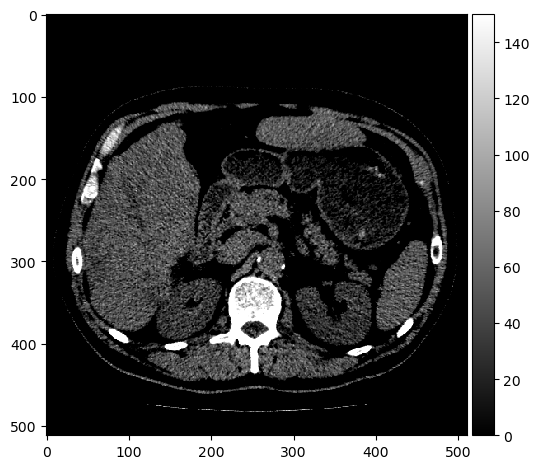

In [9]:
io.imshow(img, vmin=0, vmax=150, cmap='gray')
io.show()

## Exercise 2

In [10]:
spleen_roi = io.imread(in_dir + 'SpleenROI.png')
# convert to boolean image
spleen_mask = spleen_roi > 0
spleen_values = img[spleen_mask]

In [14]:
mu_spleen, std_spleen = np.mean(spleen_values), np.std(spleen_values)

## Exercise 3

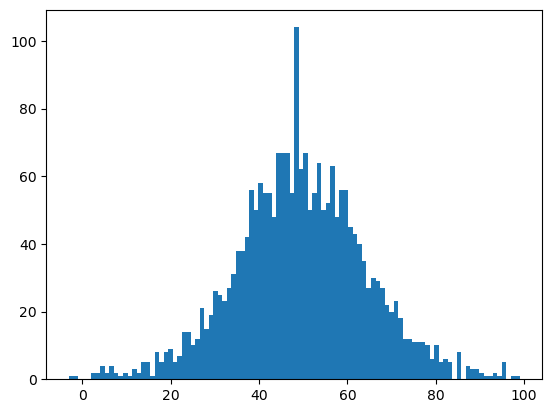

In [12]:
plt.hist(spleen_values, bins=100)
io.show()

## Exercise 4

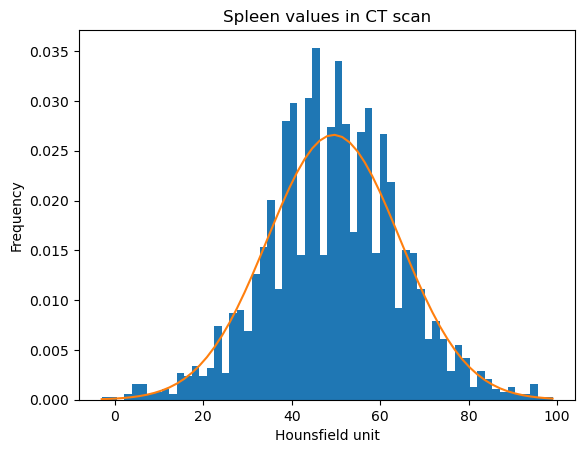

In [18]:
n, bins, patches = plt.hist(spleen_values, 60, density=1)
pdf_spleen = norm.pdf(bins, mu_spleen, std_spleen)
plt.plot(bins, pdf_spleen)
plt.xlabel('Hounsfield unit')
plt.ylabel('Frequency')
plt.title('Spleen values in CT scan')
plt.show()

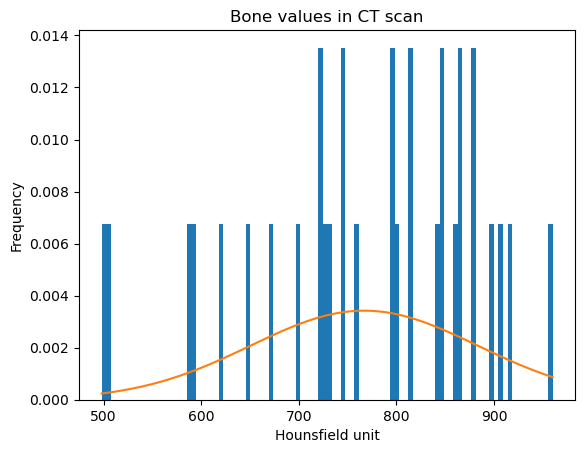

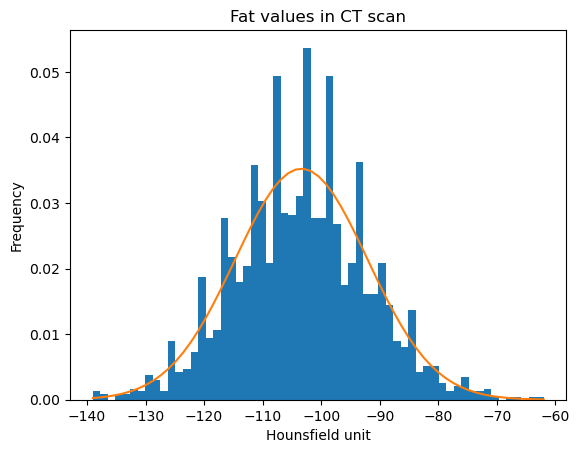

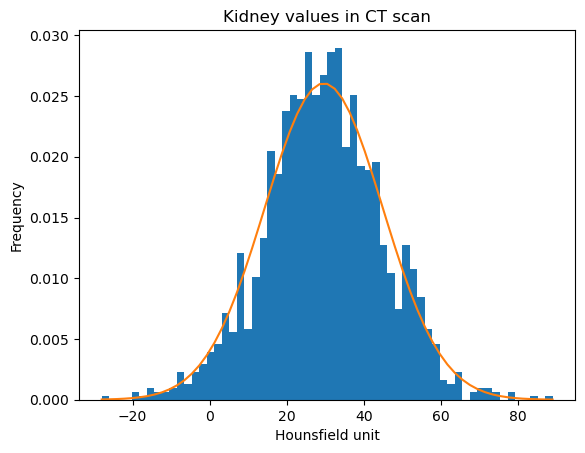

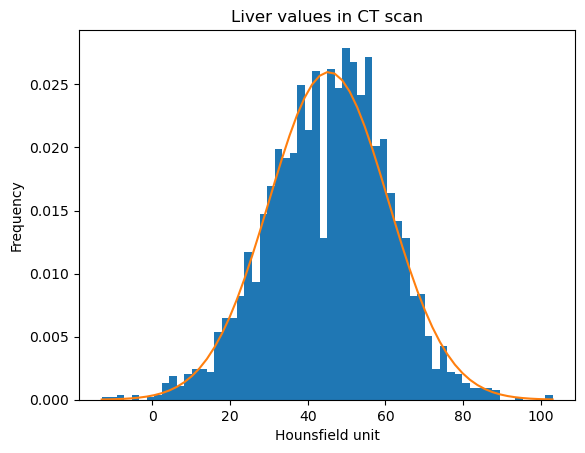

In [21]:
bone_roi = io.imread(in_dir + 'BoneROI.png')
# convert to boolean image
bone_mask = bone_roi > 0
bone_values = img[bone_mask]

fat_roi = io.imread(in_dir + 'FatROI.png')
# convert to boolean image
fat_mask = fat_roi > 0
fat_values = img[fat_mask]

kidney_roi = io.imread(in_dir + 'KidneyROI.png')
# convert to boolean image
kidney_mask = kidney_roi > 0
kidney_values = img[kidney_mask]

liver_roi = io.imread(in_dir + 'LiverROI.png')
# convert to boolean image
liver_mask = liver_roi > 0
liver_values = img[liver_mask]

mu_bone, std_bone = np.mean(bone_values), np.std(bone_values)
mu_fat, std_fat = np.mean(fat_values), np.std(fat_values)
mu_kidney, std_kidney = np.mean(kidney_values), np.std(kidney_values)
mu_liver, std_liver = np.mean(liver_values), np.std(liver_values)

n, bins, patches = plt.hist(bone_values, 100, density=1)
pdf_bone = norm.pdf(bins, mu_bone, std_bone)
plt.plot(bins, pdf_bone)
plt.xlabel('Hounsfield unit')
plt.ylabel('Frequency')
plt.title('Bone values in CT scan')
plt.show()

n, bins, patches = plt.hist(fat_values, 60, density=1)
pdf_fat = norm.pdf(bins, mu_fat, std_fat)
plt.plot(bins, pdf_fat)
plt.xlabel('Hounsfield unit')
plt.ylabel('Frequency')
plt.title('Fat values in CT scan')
plt.show()

n, bins, patches = plt.hist(kidney_values, 60, density=1)
pdf_kidney = norm.pdf(bins, mu_kidney, std_kidney)
plt.plot(bins, pdf_kidney)
plt.xlabel('Hounsfield unit')
plt.ylabel('Frequency')
plt.title('Kidney values in CT scan')
plt.show()

n, bins, patches = plt.hist(liver_values, 60, density=1)
pdf_liver = norm.pdf(bins, mu_liver, std_liver)
plt.plot(bins, pdf_liver)
plt.xlabel('Hounsfield unit')
plt.ylabel('Frequency')
plt.title('Liver values in CT scan')
plt.show()

## Exercise 5

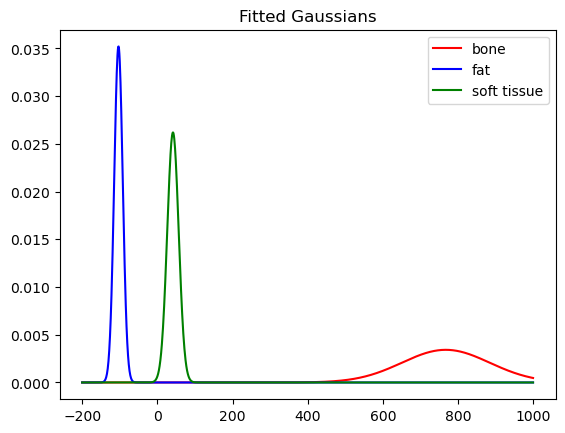

In [42]:
# Hounsfield unit limits of the plot
min_hu = -200
max_hu = 1000
hu_range = np.arange(min_hu, max_hu, 1.0)
pdf_spleen = norm.pdf(hu_range, mu_spleen, std_spleen)
pdf_bone = norm.pdf(hu_range, mu_bone, std_bone)
pdf_fat = norm.pdf(hu_range, mu_fat, std_fat)
pdf_kidney = norm.pdf(hu_range, mu_kidney, std_kidney)
mu_soft= (mu_spleen + mu_liver + mu_kidney) / 3
std_soft = (std_spleen + std_liver + std_kidney) / 3
pdf_soft = norm.pdf(hu_range, mu_soft, std_soft)
pdf_liver = norm.pdf(hu_range, mu_liver, std_liver)
#plt.plot(hu_range, pdf_spleen, 'r--', label="spleen")
plt.plot(hu_range, pdf_bone, 'r', label="bone")
plt.plot(hu_range, pdf_fat, 'b', label="fat")
#plt.plot(hu_range, pdf_kidney, 'b--', label="kidney")
plt.plot(hu_range, pdf_soft, 'g', label="soft tissue")
plt.title("Fitted Gaussians")
plt.legend()
plt.show()

We want to classify fat, bone and soft tissue

## Exercise 7

In [28]:
mu_soft = (mu_kidney + mu_liver + mu_spleen) / 3
t_fat_soft = (mu_fat + mu_soft) / 2
t_soft_bone = (mu_soft + mu_bone) / 2
print("Threshold for fat/soft tissue separation:", t_fat_soft)
print("Threshold for soft tissue/bone separation:", t_soft_bone)

Threshold for fat/soft tissue separation: -30.945024070863255
Threshold for soft tissue/bone separation: 404.21891455680213


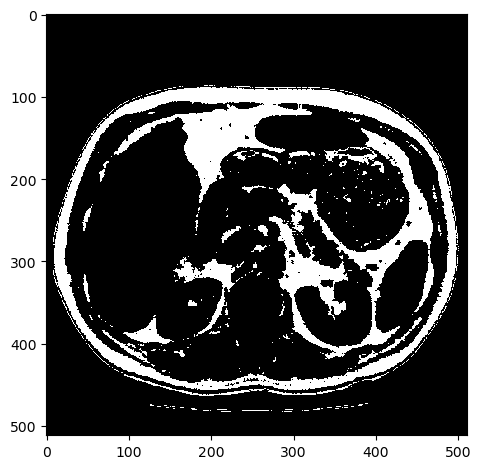

In [29]:
t_background = -200
fat_img = (img > t_background) & (img <= t_fat_soft)
io.imshow(fat_img, cmap='gray')

## Exercise 8

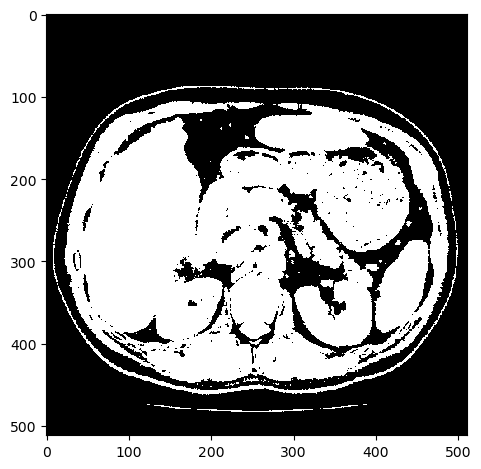

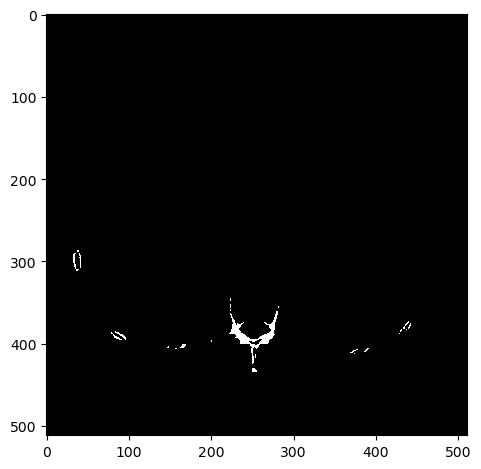

In [32]:
t_background = -200
soft_img = (img > t_fat_soft) & (img <= t_soft_bone)
io.imshow(soft_img, cmap='gray')
io.show()
bone_img = (img > t_soft_bone)
io.imshow(bone_img, cmap='gray')
io.show()

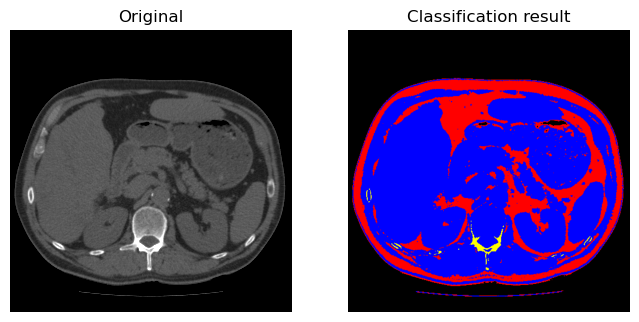

In [33]:
label_img = fat_img + 2 * soft_img + 3 * bone_img
image_label_overlay = label2rgb(label_img)
show_comparison(img, image_label_overlay, 'Classification result')

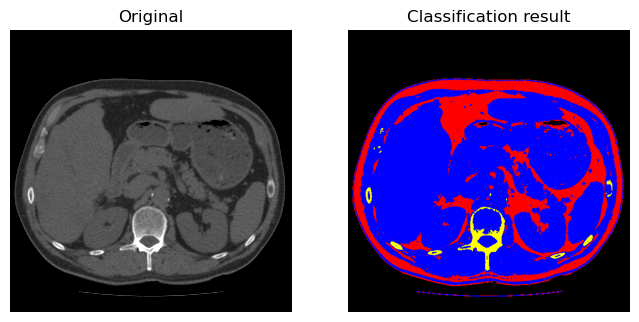

In [39]:
t_background = -200
t_fat_soft = -40
t_soft_bone = 200

fat_img = (img > t_background) & (img <= t_fat_soft)
soft_img = (img > t_fat_soft) & (img <= t_soft_bone)
bone_img = (img > t_soft_bone)

label_img = fat_img + 2 * soft_img + 3 * bone_img
image_label_overlay = label2rgb(label_img)
show_comparison(img, image_label_overlay, 'Classification result')

## Exercise 11

In [44]:
class_ranges = []

# Evaluate each HU value
for hu in hu_range:
    pdf_fat = norm.pdf(hu, mu_fat, std_fat)
    pdf_soft = norm.pdf(hu, mu_soft, std_soft)
    pdf_bone = norm.pdf(hu, mu_bone, std_bone)
    # Determine the class with the highest probability
    if pdf_fat > pdf_soft and pdf_fat > pdf_bone:
        most_probable_class = "Fat"
    elif pdf_soft > pdf_fat and pdf_soft > pdf_bone:
        most_probable_class = "Soft Tissue"
    else:
        most_probable_class = "Bone"
    
    # Append the result to the class_ranges list
    class_ranges.append((hu, most_probable_class))

# Print the class ranges
for i in range(len(class_ranges) - 1):
    if class_ranges[i][1] != class_ranges[i + 1][1]:
        print(f"{class_ranges[i][1]}: {class_ranges[i][0]} - {class_ranges[i + 1][0]}")


Fat: -42.0 - -41.0
Soft Tissue: 130.0 - 131.0


## Exercise 11

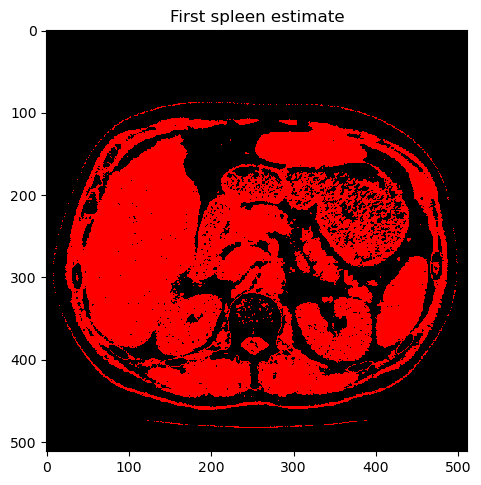

In [45]:
t_1 = 0
t_2 = 100
spleen_estimate = (img > t_1) & (img < t_2)
spleen_label_colour = color.label2rgb(spleen_estimate)
io.imshow(spleen_label_colour)
plt.title("First spleen estimate")
io.show()

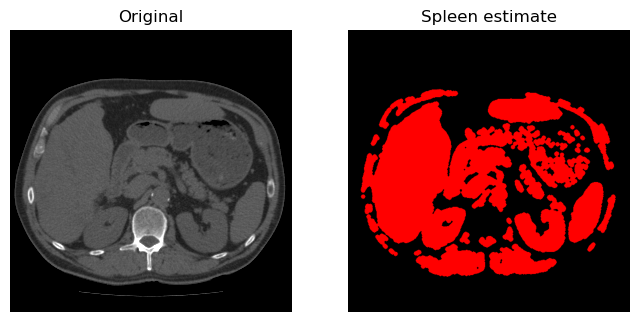

In [59]:
footprint = disk(1)
closed = binary_closing(spleen_estimate, footprint)

footprint = disk(4)
opened = binary_opening(closed, footprint)

spleen_label_colour = color.label2rgb(opened)
show_comparison(img, spleen_label_colour, 'Spleen estimate')

## Exercise 12 + 13

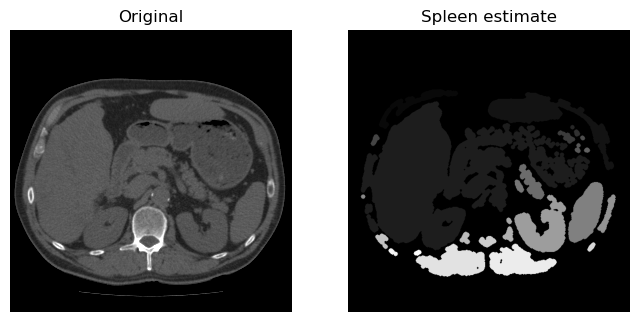

In [62]:
label_img = measure.label(opened)

show_comparison(img, label_img, 'Spleen estimate')

## Exercise 14

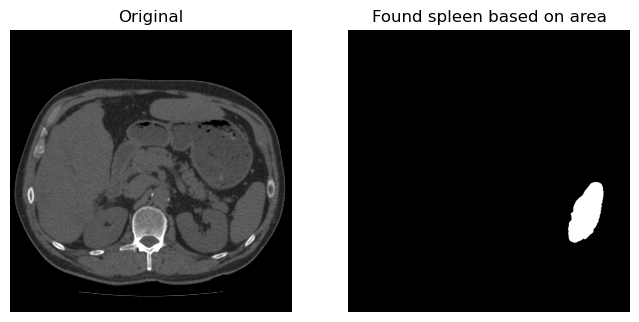

In [113]:
min_area = 4400
max_area = 4600
min_peri = 270
max_peri = 370
region_props = measure.regionprops(label_img)
# Create a copy of the label_img
label_img_filter = label_img.copy()
for region in region_props:
	 #Find the areas that do not fit our criteria
	if (region.area > max_area or region.area < min_area) and (region.perimeter < min_peri or region.perimeter > max_peri):
		# set the pixels in the invalid areas to background
		for cords in region.coords:
			label_img_filter[cords[0], cords[1]] = 0

	if (region.perimeter < min_peri or region.perimeter > max_peri):
		# set the pixels in the invalid areas to background
		for cords in region.coords:
			label_img_filter[cords[0], cords[1]] = 0

# Create binary image from the filtered label image
i_area = label_img_filter > 0
show_comparison(img, i_area, 'Found spleen based on area')

## Exercise 15

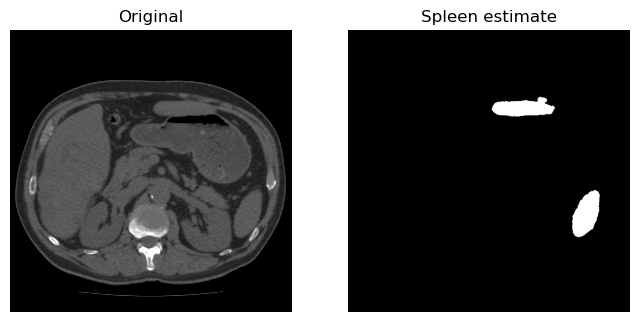

DICE score 0.8023194517659462


In [166]:
def spleen_finder(img):
    t_1 = 0
    t_2 = 100
    spleen_estimate = (img > t_1) & (img < t_2)
    footprint = disk(1)
    closed = binary_closing(spleen_estimate, footprint)

    footprint = disk(4)
    opened = binary_opening(closed, footprint)

    label_img = measure.label(opened)

    min_area = 2500
    max_area = 5300
    min_peri = 180
    max_peri = 370
    region_props = measure.regionprops(label_img)
    # Create a copy of the label_img
    label_img_filter = label_img.copy()
    for region in region_props:
        #Find the areas that do not fit our criteria
        if (region.area > max_area or region.area < min_area):
            # set the pixels in the invalid areas to background
            for cords in region.coords:
                label_img_filter[cords[0], cords[1]] = 0

        if (region.perimeter < min_peri or region.perimeter > max_peri):
            # set the pixels in the invalid areas to background
            for cords in region.coords:
                label_img_filter[cords[0], cords[1]] = 0

    # Create binary image from the filtered label image
    i_area = label_img_filter > 0

    return i_area

in_dir = "data/"
ct = dicom.dcmread(in_dir + 'Test1.dcm')
img = ct.pixel_array

spleen_img = spleen_finder(img)

show_comparison(img, spleen_img, 'Spleen estimate')

ground_truth_img = io.imread(in_dir + 'Test1_spleen.png')
gt_bin = ground_truth_img > 0
dice_score = 1 - distance.dice(i_area.ravel(), gt_bin.ravel())
print(f"DICE score {dice_score}")


## Exercise 17